## Classifying the Presence or Absence of Heart Disease

The dataset we'll be working with is publicly available [here](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29). It contains data of **270 individuals**, for which is indicated the presence or absence of heart disease. Our goal is to classify each sample with the *presence* or the *absence* of **heart disease** (our class label). Let's start by loading the data. I'll relabel the **heart_disease** column for visualization purposes.

In [16]:
import pandas as pd

df = pd.read_csv('heart.dat', sep=' ')
df = df.replace({'heart_disease': {1: 'Absence', 2: 'Presence'}})
print(df.columns)
print(len(df.columns))

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral_mgdl', 'fasting_blood_sugar_greater_than_120mgdl',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak',
       'slope_of_the_peak_exercise_ST_segment', 'number_major_vessels', 'thal',
       'heart_disease'],
      dtype='object')
14


In [14]:
df['heart_disease'].describe()

count         270
unique          2
top       Absence
freq          150
Name: heart_disease, dtype: object

In total, 14 variables describe each record, such as **age**, **sex**, **resting_blood_pressure**, among others. Also, from the 270 records, we can see that **150 show no heart disease**, meaning that there are **120 samples with the presence of a disease**.

I believe it's common sense that men seek medical counsel way less than women do. I guess that's cultural, the idea that men should be "men" (strong, fearless, etc). Consequently, while most women enjoy their beautiful lives in their 80s, most men rot in the ground - actually, [here](https://www.webmd.com/men/features/why-mens-lives-are-shorter-than-women) is a piece of evidence to set aside the common sense.

That said, the first thing I expect is that men would be more prone to heart disease than women. Let's see what our data tell us.

In [30]:
df.groupby('sex')['heart_disease'].value_counts(normalize=True)

sex  heart_disease
0.0  Absence          0.770115
     Presence         0.229885
1.0  Presence         0.546448
     Absence          0.453552
Name: heart_disease, dtype: float64

Above are the frequencies of the presence of heart disease grouped by sex. There's a significant gap between the sexes: **almost 23% of people of sex 0 have heart disease, against more than 54% of sex 1**. We do not know which is male or female, but following the thoughts aforementioned, we could say that sex 1 stands for male. Let's see if the age distributions show us something interesting.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83b0ee5f28>,
      dtype=object)

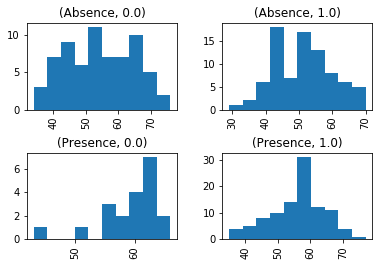

In [31]:
df.hist('age', by=['heart_disease', 'sex'])

Interestingly, the presence of heart disease in sex 1 is well distributed from age 40 to 70 with a peak around 60, while for sex 0 the data sits mostly after around age 55. I think now it's safe to say that we know which is which. These variables indeed look very important to our problem. Let's take a look at the other ones according to the class label.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8376f25dd8>,
      dtype=object)

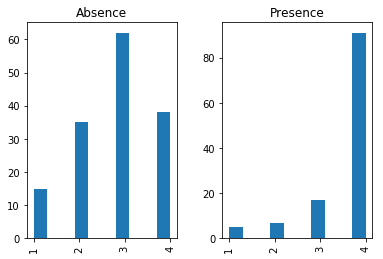

In [35]:
df.hist('chest_pain_type', by=['heart_disease'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8376dd4a58>,
      dtype=object)

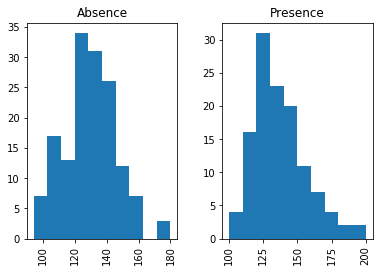

In [36]:
df.hist('resting_blood_pressure', by=['heart_disease'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8376e72ac8>,
      dtype=object)

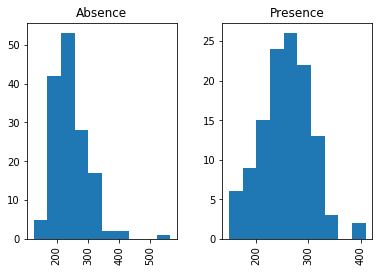

In [37]:
df.hist('serum_cholestoral_mgdl', by=['heart_disease'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8376aa8518>,
      dtype=object)

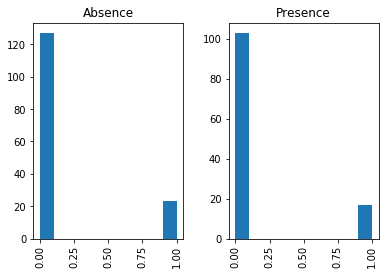

In [40]:
df.hist('fasting_blood_sugar_greater_than_120mgdl', by=['heart_disease'])

For all plotted variables, the distributions look similar for either class label, except for the **chest_pain_type**. Of those who have heart disease, the majority had chest pain of type 4 (the higher the type the more severe is the pain?). Looking at variables individually can be tricky. Alone, a high resting blood pressure could mean lots of different things, but associated with a high cholesterol they could indicate the presence of heart disease (again, I am not a doctor). To see if that's true, we must find another way of visualizing the data (we can't plot histograms grouped by one of the variables because they are both continuous). A scatter plot should do. We'll also map a color for the presence (red) or absence (green) of heart disease.

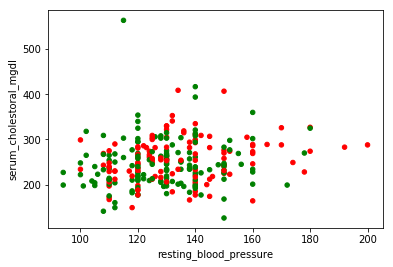

In [63]:
df['color'] = df['heart_disease'].replace({'Absence': 'green', 'Presence': 'red'})
df.plot.scatter(x='resting_blood_pressure', y='serum_cholestoral_mgdl', c=df['color'].values)

Aparently, there's no association between **cholesterol** and **blood pressure** that indicates the presence of heart disease. Similarly, we could analyze other variables looking for an association.